# Is Natural Philosophy objective?

Intro
natural philosophy is
as a predecessor to the scientific method, we assume a level of objectivity higher than other schools of philosophy
objectivity is defined as

Here we will take Aristotle's work, try to classify it's topics (identify natural philosophy vs not) and determine the overall level of objectivity to try and single it out from other philosohical

In [23]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en import English
import en_core_web_md

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/safiraraharjo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/safiraraharjo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [9]:
from spacy.lang.en.examples import sentences 

In [3]:
df = pd.read_csv('/Users/safiraraharjo/Documents/GitHub/ads-spring2023-project1-safiraharjo/data/philosophy_data.csv')

In [4]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

NLP cleaning

In [24]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(df['sentence_str']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

We are only using aristotle, so filter

In [31]:
df['cleaned'] = tokens

In [32]:
aristotle = df[df.author == 'Aristotle']

In [40]:
# dictionary_aristotle = aristotle['cleaned'].to_dict()

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(aristotle['cleaned'])

In [41]:
id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [id2word.doc2bow(doc) for doc in aristotle['cleaned']]
#https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.filter_extremes.html

In [61]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"animal" + 0.026*"man" + 0.022*"change" + 0.022*"thing" + '
  '0.018*"life" + 0.016*"exist" + 0.016*"body" + 0.016*"heat" + 0.016*"cold" + '
  '0.014*"plant"'),
 (1,
  '0.024*"case" + 0.020*"number" + 0.019*"man" + 0.017*"right" + 0.014*"body" '
  '+ 0.011*"different" + 0.011*"line" + 0.010*"reason" + 0.009*"form" + '
  '0.009*"animal"'),
 (2,
  '0.032*"man" + 0.029*"good" + 0.026*"thing" + 0.019*"sense" + 0.014*"white" '
  '+ 0.013*"principle" + 0.012*"line" + 0.012*"case" + 0.011*"clear" + '
  '0.011*"well"'),
 (3,
  '0.019*"man" + 0.013*"law" + 0.013*"case" + 0.012*"great" + 0.011*"bird" + '
  '0.011*"fish" + 0.010*"happen" + 0.010*"action" + 0.010*"end" + '
  '0.010*"office"'),
 (4,
  '0.039*"good" + 0.024*"man" + 0.018*"thing" + 0.018*"animal" + 0.017*"water" '
  '+ 0.013*"great" + 0.012*"place" + 0.010*"reason" + 0.009*"take" + '
  '0.009*"case"'),
 (5,
  '0.047*"thing" + 0.019*"excellence" + 0.017*"come" + 0.014*"cause" + '
  '0.011*"man" + 0.011*"good" + 0.011*"fe

In [69]:
list(lda_model.get_document_topics(corpus))

[[(0, 0.014289152),
  (1, 0.014290297),
  (2, 0.014289366),
  (3, 0.014289108),
  (4, 0.014289804),
  (5, 0.8713943),
  (6, 0.014291618),
  (7, 0.014288591),
  (8, 0.014287472),
  (9, 0.014290326)],
 [(0, 0.7749672),
  (1, 0.025004426),
  (2, 0.025004398),
  (3, 0.025003767),
  (4, 0.025005108),
  (5, 0.025002284),
  (6, 0.02500184),
  (7, 0.025001148),
  (8, 0.02500811),
  (9, 0.025001708)],
 [(0, 0.012507849),
  (1, 0.012505275),
  (2, 0.012503861),
  (3, 0.012503505),
  (4, 0.01250496),
  (5, 0.88746005),
  (6, 0.012503566),
  (7, 0.012502308),
  (8, 0.012503861),
  (9, 0.012504813)],
 [(0, 0.016670844),
  (1, 0.016669335),
  (2, 0.016670497),
  (3, 0.016670657),
  (4, 0.016671574),
  (5, 0.84996253),
  (6, 0.016673828),
  (7, 0.016669823),
  (8, 0.016668836),
  (9, 0.016672114)],
 [(0, 0.77496517),
  (1, 0.025004428),
  (2, 0.0250044),
  (3, 0.025003767),
  (4, 0.025005111),
  (5, 0.025002284),
  (6, 0.02500184),
  (7, 0.025001146),
  (8, 0.025010131),
  (9, 0.025001708)],
 [(0, 0.

In [65]:
train_vecs = []
for i in range(len(rev_train)):
    top_topics = (
        lda_train.get_document_topics(train_corpus[i],
                                      minimum_probability=0.0)
    )
    topic_vec = [top_topics[i][1] for i in range(20)]
    topic_vec.extend([rev_train.iloc[i].real_counts])
    topic_vec.extend([len(rev_train.iloc[i].text)])
    train_vecs.append(topic_vec)

In [58]:
topics = []
score = []
for i in range(2,20,1):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=aristotle['cleaned'], dictionary=id2word, coherence='c_v')
    topics.append(i)
    score.append(coherence_model_lda.get_coherence())

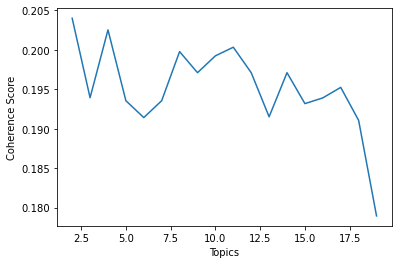

In [59]:
plt.figure()
plt.plot(topics, score)
plt.xlabel('Topics')
plt.ylabel('Coherence Score')
plt.show()

In [62]:
topics

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]